# Final Project

### Data Cleanup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('data/billboard-1964-2015-songs-lyrics.zip',index_col='index')
# try reading all data sets


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 329: invalid continuation byte

In [3]:
display(data.head())
data.shape

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


(362237, 5)

In [4]:
# drop na 
data = data.dropna()
data.shape

(266556, 5)

In [5]:
year = data['year'].unique()
year

array([2009, 2007, 2013, 2010, 2012, 2006, 2016, 2011, 2015, 2008, 2014,
       1998, 2002, 1995, 2004, 1972, 2005, 1978, 1970, 1981, 1994, 1997,
       1993, 1982, 1983, 1986, 1992, 1977, 1989, 1979, 1996, 2001, 1990,
       1987, 2003, 1975, 1973, 1991, 1999, 1974, 2000, 1980, 1984, 1976,
        702, 1971, 1985, 1988,  112, 1968,   67], dtype=int64)

In [6]:
# drop those in the wrong year
wrong_year = data.loc[data['year'].isin([67,2038,112,702])]
display(wrong_year)
print('Wrong Year shape',wrong_year.shape)
data.drop(data.loc[data['year'].isin([67,2038,112,702])].index, inplace=True)
data.shape

,song,year,artist,genre,lyrics
index,,,,,
27657,star,702,clipse,Hip-Hop,You're my star\nIt's such a wonder how you shi...
69708,anywhere-remix,112,dru-hill,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
147914,it-s-over-now-remix,112,g-dep,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
238541,come-see-me-remix,112,black-rob,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,i-can-t-believe,112,faith-evans,Pop,[Chorus]\nI can't believe that love has gone a...


Wrong Year shape (6, 5)


(266550, 5)

In [7]:
# drop Not available genre
print(data['genre'].unique())
data.drop(data.loc[data['genre']=='Not Available'].index, inplace=True)
data.shape

['Pop' 'Hip-Hop' 'Not Available' 'Rock' 'Metal' 'Other' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie']


(242609, 5)

In [8]:
# check that column values are valid
print('Genres: ',np.sort(data['genre'].unique()))
print('Artist: ',np.sort(data['artist'].unique()))
print('Year: ',np.sort(data['year'].unique()))
print(data.shape)


Genres:  ['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Other'
 'Pop' 'R&B' 'Rock']
Artist:  ['009-sound-system' '047' '1-800-zombie' ... 'the-grates'
 'the-graveyard-boulevard' 'the-great-flood-catastrophe']
Year:  [1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]
(242609, 5)


In [9]:
# lower characters
data['lyrics'] = data['lyrics'].str.lower()
data.shape
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"oh baby, how you doing?\nyou know i'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,if you search\nfor tenderness\nit isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"party the people, the people the party it's po..."


In [10]:
#remove line break and punctuation
data['lyrics'] = data['lyrics'].str.replace('[^\w\s]','')
data = data.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...


## Parameters for word count

In [29]:
# variables needed for word cleanup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print('Initially there are: ',len(stopwords),' stopwords')
stopwords+= ['verse','chorus','im','dont','oh','got','get','yeah','you','youre','let']
from nltk.tokenize import RegexpTokenizer
print('there are ',len(stopwords),'stopwords')

stopwords

Initially there are:  179  stopwords
there are  190 stopwords


[nltk_data] Downloading package stopwords to C:\Users\Jing
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
test='oh baby oh how doing you know'
[word for word in test.split() if word not in stopwords]

['baby', 'know']

In [39]:
for artist in np.unique(data['artist']).tolist():
    print(artist)

009-sound-system
047
1-800-zombie
10-cc
10-years
100-demons
100-monkeys
10000-maniacs
1000mods
104
10cm
10digits
11-11
112
11th-hour
12-rounds
12-stones
12am
13-engines
13-winters
14-bis
16-bit
16-frames
16-horsepower
16-stitch
16volt
1910-fruitgum-company
1974-ad
1982
1982-termanology-and-statik-selektah
1984
1987
1997
199x
1sb
1st-lady
2-4-family
2-54
2-be-3
2-bears
2-brothers-on-the-4th-floor
2-chainz
2-chainz-wiz-khalifa
2-demz
2-fabiola
2-for-good
2-live-crew
2-live-jews
2-pistols
2-shy
2-skinnee-js
2-unlimited
2-us
20-fingers
2013-sbs-edegiei-friendship-project
21-guns
21-savage
211
213
22-20s
22-pistepirkko
22-savage
24hrs
257ers
28-days
28-north
2am
2am-club
2bic
2cellos
2cellos-sulic-hauser
2contra1
2gether
2l8
2merica
2nd-ii-none
2ne1
2nei
2nyo
2pac
2pac-outlawz
2pm
2raumwohnung
2sc
2shaddy
2ways
2win
2wink
2wo-plus
3-colours-red
3-doors-down
3-elements
3-generation
3-inches-of-blood
3-o-matic
3-of-hearts
3-rings-fire
3-winans-brothers
3-years-hollow
30-dirty-thoughts
30-seco

anna-waronker
anna-wise
annabel-fay
annabelle
annakin-slayd
annalisa
annasay
annasophia-robb
anne-clarke
anne-dudley
anne-haigis
anne-hathaway
anne-linnet
anne-marie
anne-murray
anne-shelton
anne-sila
anneke-van-giersbergen
anneli-drecker
anneli-marian-drecker
annelise
annenmaykantereit
annett-louisan
annette-moreno
anngelik
anni-b-sweet
annie
annie-golden
annie-haslam
annie-lennox
annie-mae-mcdowell
annie-mccausland
annie-moses-band
annie-oakley-hanging
annie-ross
annie-villeneuve
annihilator
annika-vitolo
annisstar
anniverscary
annotations-of-an-autopsy
annuals
anoche-vi-llover
anohni
anon
anonxmous
anonym
anonymous
anonymuse
anoop-desai
anorexia-nervosa
another-bad-creation
another-breath
another-day-late
another-level
anouk
anri-jokhadze
anselmo-ralph
ansolo
answer-with-metal
ant-and-dec
ant-banks
ant-bee
antalgia
antares
anteros
antestor
anthem-lights
anthony-b
anthony-bvlgari
anthony-callea
anthony-evans
anthony-fallacaro
anthony-faulkner
anthony-green
anthony-lewis
anthony-lucio

bezz-believe
bfs
bg-knocc-out-dresta
bhajan
bhayankar
bhi-bhiman
bia
biagio-antonacci
bianca
bianca-ryan
bibi-bourelly
bibio
bic-runga
bif-naked
biff-rockmore
biffy-clyro
big-10-4
big-audio-dynamite
big-baby-gandhi
big-bad
big-bad-vodoo-daddy
big-bad-voodoo-daddy
big-bang
big-bear
big-bill-bissonnette
big-black
big-black-delta
big-blood-the-bleeding-hearts
big-blue-ball
big-boi
big-bopper
big-boss
big-boy
big-boys
big-brother-and-the-holding-company
big-brovas
big-brovaz
big-business
big-charlie
big-city-kids
big-country
big-cyc
big-d
big-d-and-the-kids-table
big-daddy-kane
big-daddy-weave
big-daddy-wilson
big-data
big-deal
big-dismal
big-ditch-road
big-ed
big-electric-cat
big-engine
big-face-luciano
big-gigantic
big-gipp
big-grams
big-h
big-head-blues-club
big-head-todd-and-the-monsters
big-house
big-joe-turner
big-k-r-i-t
big-kenny
big-kuntry-king
big-l
big-l-c-t
big-lou
big-maceo
big-mama-thornton
big-maybelle
big-mike
big-moe
big-mountain
big-noyd
big-pokey
big-pun
big-punisher
big

cana
canaan
canaan-smith
canadian-bush-party
cancer
cancer-bats
cancerslug
candace-jones
candee-jay
candi-staton
candice
candice-alley
candice-boyd
candice-sand
candice-skjonnemand
candido
candiria
candlebox
candlemass
candy-claws
candy-coated-chaos
candy-hill
candy-laflora
candy-rain
candybag
cane-hill
canibus
canines
cannae
canned-heat
canned-heat-john-lee-hooker
cannibal-corpse
cannibal-ox
cannibal-the-headhunters
cannonball-adderley
cannonball-adderley-the-bossa-rio-sextet
cant
cantajuego
cantatonia
canto-dos-malditos-na-terra-do-nunca
canton-jones
cantus
cap-1
capdown
cape-cub
capercaillie
capetown
capistrano
capital-cities
capital-inicial
capital-kings
capital-lights
capital-sound
capital-steez
capital-t
capitan-melao
capleton
capo
capone-n-noreaga
cappa
cappadonna
cappella
capsule
captain-and-tennille
captain-beefheart
captain-beefheart-the-magic-band
captain-beyond
captain-credit
captain-dangerous
captain-everything
captain-hollywood-project
captain-hooks
captain-jack
captain-j

covenant-worship
cover-drive
cover-girls
coverdale-page
coves
covette
cowboy
cowboy-crush
cowboy-junkies
cowboy-mouth
cowboy-troy
cowboybengts
cowsills
coyote-kisses
cozz
cpex
cpm-22
crack
crack-the-sky
crack-up
cracker
crackout
cradle-of-filth
craft
craft-spells
craig-armstrong
craig-campbell
craig-cardiff
craig-david
craig-douglas
craig-finn
craig-fuller
craig-herbertson
craig-mack
craig-morgan
craig-s-brother
craig-wayne-boyd
cramer-creative
cramps
cranberries
crash
crash-kings
crash-romeo
crash-test-dummies
crashdiet
crashdog
crashing-jericho
crass
cravin-melon
craving-lucy
craving-theo
craw
crawdad-republic
crazy-for-you
crazy-friendz
crazy-frog
crazy-horse
crazy-lixx
crazy-loop
crazytown
crduan-xshadows
cream
creation-s-tears
creative-adult
creative-gold
creature-feature
creatures
crecer-german
cree-summer
creed
creedence-clearwater-revival
creekwood
creep
creeper
creeper-lagoon
creepmime
crematory
creme-21
cressida
crest
crest-of-darkness
cribs
crime-in-stereo
crime-mob
criminal

dionne-broomfield
dionne-farris
dionne-warwick
dionysos
dionysus
dios
dipha-barus
diphill
diplo
diplo-skrillex
diplomats
dipnoi-fish
dipset
dir-en-grey
dire-straits
dire-straits-mark-knopfler
direct-hit
dirge
dirt-nasty
dirt-poor-robins
dirtie-blonde
dirty
dirty-dancing
dirty-dave-osti
dirty-gold
dirty-looks
dirty-loops
dirty-money
dirty-pretty-things
dirty-purple
dirty-river-boys
dirty-sanchez
dirty-south
dirty-sweet
dirty-vegas
disablast
disappear-fear
disarmonia-mundi
disaster-in-the-universe
disbelief
discharge
disciple
disciples
disclosure
disco-boys
disco-inferno
disco-shrine
discokid
discopolis
discount
discover-america
discovery
discovery-worship
disebo
disfiguring-the-goddess
disgorge
dish
disharmonic-orchestra
dishonored
dishwalla
disillusion
dismal-euphony
dismember
dismemberment-plan
disney
disney-channel-stars
dispatch
dissection
dissolving-of-prodigy
distant-sun
distorted-penguins
district-78
district-97
district-xiii
district3
disturbed
disturbing-tha-peace
div
diva
dive

el-prodigio
el-pus
el-rey
el-rey-lemao-n
el-silencio-de-igor
el-sueao-de-morfeo
el-tri
el-trono-de-mexico
el-tsavi
el-vy
elae
elaine-silver
elaiza
elakelaiset
elan
elana-james
elastica
elastinen
elbow
elbow-bones-the-racketeers
eld-emmanuel-boate
elder-king
eldest-11
eldo
eldritch
ele7en
eleanoora-rosenholm
eleanor
eleanor-mcevoy
eleanor-shore
electrasy
electrelane
electric-century
electric-eel-shock
electric-fan-death
electric-frankenstein
electric-guest
electric-light-orchestra
electric-owls
electric-president
electric-river
electric-sasquatch
electric-six
electric-touch
electric-valentine
electric-wizard
electric-youth
electrico
electrik-red
electro-deluxe
electro-hippies
electro-velvet
electrocute
electrolyze
electronic
electrovamp
electrovot
eleeza-r
elefant
elefante
elefantes
elegant-machinery
elegy
elekfantz
elektric-music
elektrik-people
elektroduendes
elel
element
element-101
element-black
element-eighty
element-of-crime
elemental
elen-levon
elena-ammerman
elena-gadel
elena-gh

feli-nuna
felice-brothers
felicia-barton
felito-el-caballote
felix-cartal
felix-da-housecat
felix-jaehn
felix-sasa
felix-snow
felli-fel
feloni
feltip-pens
feminin
fences
fenech-soler
fenix
fenix-tx
fenomenon
feral-children
feralie
fergie
ferium
ferlin-huskey
ferlin-husky
fernandinho
fernando-amado
fernando-ortega
fernando-sorocaba
fernweher
ferras
ferry-corsten
fettes-brot
fetty-wap
fever-fever
fever-ray
fever-tree
few-left-standing
fey
fez-williamz
fff
ffh
ffs
fhangor
fhb
fi
fialta
fickle-friends
fiction-factory
fiction-family
fiction-plane
fiddler-s-green
fidlar
field-mice
field-mob
field-music
field-report
field-trip
fields-of-the-nephilim
fiend
fiesta-filipina
fiestar
fifteen
fifth-harmony
fifth-haven
fifty-fifty
fight
fighting-gravity
fighting-instinct
fighting-jacks
fighting-kind
fightstar
figure
figure-four
figurine
figurines
fiji
filipa
filter
filthy-dukes
filthy-frank-aka-george-miller
final-breakup
final-fantasy
final-outlaw
finch
finde
finding-clyde
finding-favour
findlay
fi

glenn-tilbrook
glenn-yarbrough
glennis-grace
global-citizen
global-deejays
globe
gloc9
gloomy-guys
gloria
gloria-estefan
gloria-gaynor
gloria-lynne
gloria-scott
gloria-trevi
gloriana
glorina
glory
glow
glowjack-vs-plamen-dereu
gluecifer
glynn-leaney
gnags
gnarls-barkley
gnarwolves
gnash
gnx
go-audio
go-back-to-the-zoo
go-betty-go
go-betweens
go-dav
go-go-berlin
go-go-go
go-jimmy-go
go-radio
go-west
goats-with-headlamps
goatwhore
gob
gocho-el-lapiz-de-platino
god
god-des-and-she
god-dethroned
god-forbid
god-lives-underwater
god-machine
god-module
god-or-julie
godfathers
godflesh
godgory
godhead
godiego
godley-and-creme
gods-paparazzi
godsend
godsmack
godspeed-you-black-emperor
godwill-babette
gogol-bordello
goin-through
gojira
gokce-ka-la-ncer
gokhan-turkmen
gola
gold-1
gold-bears
gold-fields
gold-panda
gold-top
golden
golden-coast
golden-earring
golden-features
golden-films
golden-gate-quartet
golden-horn
golden-rules
golden-smog
goldenboy
goldfinger
goldfish
goldfrapp
goldheart-assemb

## Meauring word repitition in individual songs
we would like to evaluate how repititive a song is like Gucci Gang or Daft Punk's all around the world. We want to evaluate how "diverse" a song is. Does the artist only use a few words to compose a long song like in Gucci Gang or Daft Punk's All AROund the World? <br/> <br/>

We thus come up with a measure of this called variance. we will measure the number of unique words the author uses in his song. To avoid stop words artificially inflating their score we will remove stop words. Procedure is as follow:
1. Remove stop words
2. calculate number of unique words
3. calculate song length
$$\text{variance}=\frac{\text{Number of unique words}}{\text{Number of words in song lyrics}}$$
The lower the variance score, the more repitive the song
<br/>

we would also like to avoid the artist using derivative of words (eg. general --> generalized) to boost their variance score therefore we also have a score called variance root 
1. Remove stop words
2. convert all words to thier root words
2. calculate number of unique root words
3. calculate song length
$$\text{variance-root}=\frac{\text{Number of unique root words}}{\text{Number of words in song lyrics}}$$
Conversion to root word is done using `nltk`'s `SnowballStemmer` function

In [36]:
from stemming.porter2 import stem # this stemming library is used becuase it can work in list comprehension

# remove stop words from lyrics
data['list'] = data['lyrics'].str.split()
# convert words to root words for variance-root
# data['variance-root'] = [stem(word) for word in data['variance']]
data.head()

data['variance'] = [word for word in df['list']]

SyntaxError: invalid syntax (<ipython-input-36-0004360dd4d7>, line 9)

In [31]:
[word for word in data['variance'][0] if word not in stopwords]

['baby',
 'know',
 'gonna',
 'cut',
 'right',
 'chase',
 'women',
 'made',
 'like',
 'think',
 'created',
 'special',
 'purpose',
 'know',
 'whats',
 'special',
 'feel',
 'baby',
 'lets',
 'lost',
 'need',
 'call',
 'work',
 'cause',
 'boss',
 'real',
 'want',
 'show',
 'feel',
 'consider',
 'lucky',
 'thats',
 'big',
 'deal',
 'well',
 'key',
 'heart',
 'aint',
 'gonna',
 'need',
 'id',
 'rather',
 'open',
 'body',
 'show',
 'secrets',
 'didnt',
 'know',
 'inside',
 'need',
 'lie',
 'big',
 'wide',
 'strong',
 'wont',
 'fit',
 'much',
 'tough',
 'talk',
 'like',
 'cause',
 'back',
 'big',
 'ego',
 'huge',
 'ego',
 'love',
 'big',
 'ego',
 'much',
 'walk',
 'like',
 'cause',
 'back',
 'usually',
 'humble',
 'right',
 'choose',
 'leave',
 'could',
 'blues',
 'call',
 'arrogant',
 'call',
 'confident',
 'decide',
 'find',
 'working',
 'damn',
 'know',
 'killing',
 'legs',
 'better',
 'yet',
 'thighs',
 'matter',
 'fact',
 'smile',
 'maybe',
 'eyes',
 'boy',
 'site',
 'see',
 'kind',
 'so

In [19]:
df = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
df.head()

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
# remove stop words from lyrics
data['variance'] = [word for word in data['lyrics'].str.split() if word not in stopwords] 
# convert words to root words for variance-root
data['variance-root'] = [stemmer.stem(word) for word in data['variance']]
# calculate number of unique words/number of lyrics 
data['variance'] = np.unique(np.array(data['variance'])).shape[0] / len(data['variance'])
data['variance-root']=np.unique(np.array(data['variance-root'])).shape[0] / len(data['variance-root'])
data.head()

In [58]:
# data.to_csv('data/lyrics_clean.csv',index=False)

## Number of Songs by Genre

In [59]:
data.groupby(['genre']).count()

,song,year,artist,lyrics
genre,,,,
Country,14387,14387,14387,14387
Electronic,7966,7966,7966,7966
Folk,2243,2243,2243,2243
Hip-Hop,24845,24845,24845,24845
Indie,3149,3149,3149,3149
Jazz,7970,7970,7970,7970
Metal,23759,23759,23759,23759
Other,5189,5189,5189,5189
Pop,40465,40465,40465,40465


In [60]:
pop_data = data.loc[data['genre'] == 'Pop']

In [61]:
pop_data.shape #sanity check shold be amount of pop sons described above

(40465, 5)

In [62]:
# function to analysze word count in pandas dataframe lyrics colume

###########
# Get word count from pandas dataframe
# 
#INPUT: pands dataframe where 'lyrics' column contains song lyrics (alsready pre-processed)
# n--> number of most common words to print out
# PRE-REQ: nltk library stopwrods (with words verse and chorus)
#          matplotlib to plot
#
#OUTPUT: word count before and after stop word filtering, 50 most common words
#################
def word_count(dataframe,n,title):
    lyric_list = dataframe['lyrics'].tolist()
    lyric=[]
    for i in lyric_list:
        lyric+=i.split()
    print('With stop words there word count is: ',len(lyric))
    # https://chrisalbon.com/machine_learning/preprocessing_text/remove_stop_words/
    lyrics_no_stopwords=[word for word in lyric if word not in stopwords]
    print('No stop words, word count: ',len(lyrics_no_stopwords))
    # https://medium.com/@manivannan_data/word-count-using-nlp-python-da7725166d2a
    fdist1 = nltk.FreqDist(lyrics_no_stopwords)
    print(n,' most common words: ')
    result = fdist1.most_common(n)
    print (result)
    count = fdist1.most_common(10)
    words = [x[0] for x in count]
    words_count = [x[1] for x in count]
    plt.figure(figsize=(7,7))
    plt.barh(np.arange(len(words)),words_count, align='center',alpha=0.5)
    plt.yticks(np.arange(len(words)),words)
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.title(str('Top 10 words for '+title+'songs'))
    plt.show()
          
        

## Analyze song lyrics in the 70s

In [63]:
# get songs that are before 1980
song_70s = pop_data.loc[pop_data['year']<1980]
# sanity check
print('years present here are: ',np.sort(song_70s['year'].unique()))
song_70s.head()

years present here are:  [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979]


,song,year,artist,genre,lyrics
index,,,,,
10587,where-did-our-love-go,1979,diana-ross-the-supremes,Pop,baby baby baby dont leave me ooh please dont l...
10588,baby-love,1979,diana-ross-the-supremes,Pop,baby love my baby love i need you oh how i nee...
10589,i-m-coming-out,1979,diana-ross-the-supremes,Pop,im coming out im coming im coming out im comin...
10590,you-can-t-hurry-love,1979,diana-ross-the-supremes,Pop,i need love love to ease my mind i need to fin...
10591,you-keep-me-hangin-on,1979,diana-ross-the-supremes,Pop,set me free why dont cha baby get out my life ...


With stop words there word count is:  40136
No stop words, word count:  19048
50  most common words: 
[('love', 626), ('know', 270), ('baby', 258), ('see', 160), ('like', 159), ('never', 156), ('want', 155), ('life', 148), ('ive', 139), ('time', 139), ('cant', 137), ('one', 135), ('need', 126), ('go', 122), ('thats', 120), ('world', 117), ('day', 116), ('sweet', 113), ('ill', 112), ('feel', 110), ('make', 109), ('cause', 105), ('theres', 104), ('come', 104), ('night', 98), ('say', 96), ('gonna', 91), ('man', 87), ('way', 86), ('give', 86), ('heart', 85), ('take', 85), ('keep', 83), ('aint', 83), ('every', 82), ('could', 82), ('enough', 82), ('babe', 79), ('tell', 77), ('think', 76), ('ever', 73), ('good', 70), ('always', 69), ('well', 68), ('back', 67), ('without', 66), ('hear', 65), ('really', 65), ('yes', 65), ('things', 65)]


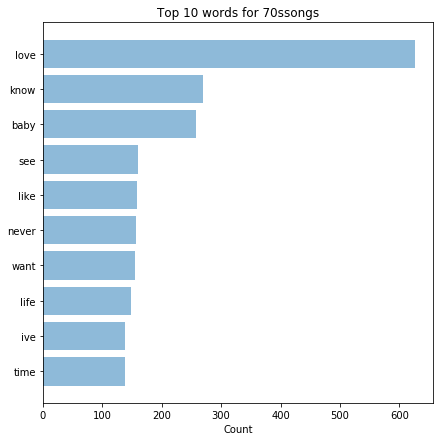

In [64]:
# split string into words then put it into a list
word_count(song_70s,50,'70s')

## Analyze 80s song lyrics

In [65]:
song_80s = pop_data.loc[pop_data['year'].between(1980, 1989, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_80s['year'].unique()))
song_80s.head()

years present here are:  [1980 1981 1982 1983 1984 1985 1986 1988 1989]


,song,year,artist,genre,lyrics
index,,,,,
4035,she-s-a-bad-mama-jama-she-s-built-she-s-stacked,1981,carl-carlton,Pop,yeah ooh oohoohhoo look at her shes a bad mama...
22042,in-conversation,1986,general-public,Pop,in conversation in conversation in conversatio...
22043,forward-as-one,1986,general-public,Pop,duck cover in the tower of babel train your c...
22044,faults-all,1986,general-public,Pop,cant take my own advice your letter reached me...
22045,cheque-in-the-post,1986,general-public,Pop,cheque in the post cheque in the post im looki...


With stop words there word count is:  61914
No stop words, word count:  33519
50  most common words: 
[('love', 872), ('la', 387), ('like', 286), ('know', 276), ('never', 275), ('one', 250), ('go', 209), ('day', 188), ('come', 188), ('want', 165), ('time', 163), ('que', 162), ('heart', 157), ('world', 156), ('away', 149), ('say', 143), ('take', 138), ('way', 134), ('ill', 129), ('make', 127), ('see', 126), ('cant', 123), ('life', 121), ('rain', 120), ('night', 119), ('tell', 118), ('baby', 118), ('find', 114), ('think', 112), ('look', 108), ('could', 108), ('shes', 107), ('de', 107), ('cause', 106), ('well', 102), ('theres', 100), ('much', 93), ('man', 93), ('el', 91), ('feel', 89), ('still', 86), ('hot', 86), ('right', 83), ('thats', 82), ('ive', 82), ('back', 81), ('nothing', 81), ('eyes', 81), ('forever', 78), ('gonna', 78)]


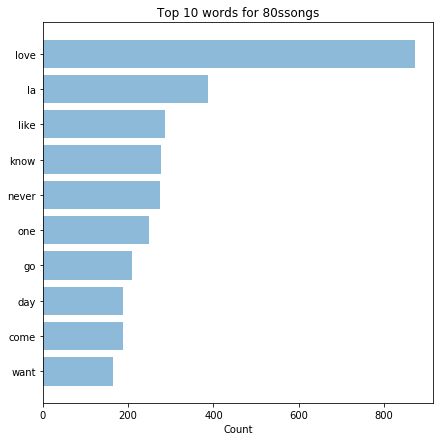

In [66]:
word_count(song_80s,50,'80s')

## Analyze 90s song lyrics

In [67]:
song_90s = pop_data.loc[pop_data['year'].between(1990, 1999, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_90s['year'].unique()))
song_90s.head()

years present here are:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]


,song,year,artist,genre,lyrics
index,,,,,
5132,the-little-drummer-boy,1990,boston-pops,Pop,come they told me pa rum pum pum pum a new bor...
5134,winter-wonderland,1990,boston-pops,Pop,over the ground lies a mantle white a heaven o...
5136,santa-claus-is-comin-to-town,1990,boston-pops,Pop,i just came back from a lovely trip along the ...
5139,white-christmas,1990,boston-pops,Pop,im dreaming of a white christmas just like the...
5141,carol-of-the-bells,1990,boston-pops,Pop,instrumental


With stop words there word count is:  212996
No stop words, word count:  117997
50  most common words: 
[('love', 2319), ('que', 1228), ('know', 1158), ('de', 1085), ('la', 1000), ('baby', 923), ('like', 840), ('never', 836), ('time', 802), ('want', 758), ('one', 734), ('see', 663), ('go', 656), ('ill', 617), ('come', 609), ('heart', 581), ('cant', 571), ('en', 568), ('life', 552), ('girl', 538), ('say', 535), ('un', 524), ('way', 518), ('could', 503), ('el', 500), ('need', 487), ('tu', 487), ('away', 486), ('je', 464), ('night', 463), ('feel', 444), ('make', 435), ('take', 431), ('cause', 430), ('back', 422), ('ive', 420), ('te', 410), ('day', 409), ('good', 386), ('tell', 356), ('always', 340), ('right', 336), ('give', 335), ('every', 333), ('theres', 330), ('le', 330), ('et', 330), ('little', 329), ('se', 329), ('would', 321)]


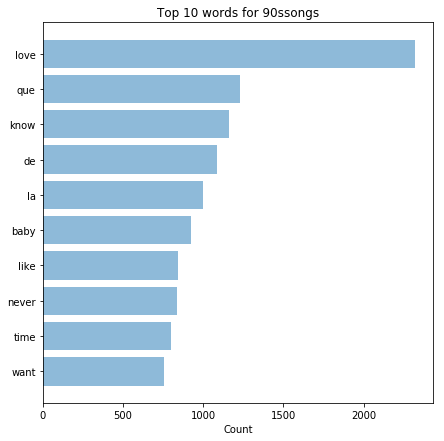

In [68]:
word_count(song_90s, 50,'90s')

## Analyze 2000s song lyrics

In [69]:
song_00s = pop_data.loc[pop_data['year'].between(2000, 2009, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_00s['year'].unique()))
song_00s.head()

years present here are:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]


,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...


With stop words there word count is:  5778289
No stop words, word count:  2985220
50  most common words: 
[('love', 50111), ('know', 36780), ('like', 27141), ('baby', 24441), ('want', 21270), ('one', 19851), ('time', 19493), ('go', 19254), ('see', 18943), ('never', 18851), ('cant', 18353), ('way', 16678), ('come', 16649), ('cause', 16248), ('say', 16198), ('make', 15543), ('ill', 14873), ('feel', 14415), ('la', 14275), ('que', 14199), ('heart', 13906), ('take', 13674), ('need', 13375), ('gonna', 12348), ('life', 11718), ('away', 11717), ('back', 11553), ('right', 11261), ('could', 11098), ('de', 11080), ('girl', 11076), ('tell', 11043), ('ive', 11006), ('give', 10483), ('day', 10420), ('wanna', 10248), ('night', 10009), ('world', 9138), ('think', 9070), ('thats', 8855), ('theres', 8694), ('keep', 8052), ('good', 7979), ('wont', 7750), ('eyes', 7687), ('every', 7681), ('well', 7661), ('would', 7651), ('always', 7566), ('aint', 7289)]


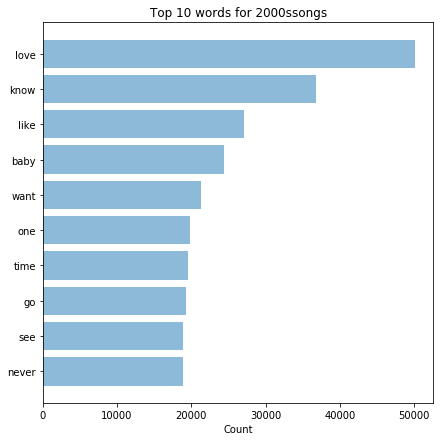

In [70]:
word_count(song_00s,50,'2000s')

## Analyze 2010s song lyrics

In [71]:
song_10s = pop_data.loc[pop_data['year'].between(2010, 2020, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_10s['year'].unique()))
song_10s.head()

years present here are:  [2010 2011 2012 2013 2014 2015 2016]


,song,year,artist,genre,lyrics
index,,,,,
55,back-to-black,2013,beyonce-knowles,Pop,andre 3000 i i i left no time to regret kept m...
56,mine,2013,beyonce-knowles,Pop,verse 1 beyonce ive been watching for the sign...
57,superpower,2013,beyonce-knowles,Pop,verse 1 when the palm of my two hands hold eac...
58,haunted,2013,beyonce-knowles,Pop,intro presenter the winner is beyonce knowles ...
59,flawless,2013,beyonce-knowles,Pop,intro your challengers are a young group from ...


With stop words there word count is:  3832095
No stop words, word count:  2100557
50  most common words: 
[('love', 29095), ('know', 23175), ('like', 22424), ('go', 14558), ('baby', 14265), ('que', 12796), ('la', 12414), ('never', 11718), ('want', 11180), ('one', 11107), ('cant', 11107), ('cause', 10988), ('time', 10490), ('see', 10370), ('make', 9803), ('ill', 9754), ('wanna', 9723), ('say', 9716), ('come', 9550), ('de', 9508), ('way', 9013), ('feel', 8654), ('heart', 8622), ('take', 8469), ('need', 8367), ('back', 8011), ('right', 7644), ('girl', 7619), ('gonna', 7521), ('tell', 6636), ('away', 6583), ('life', 6528), ('ive', 6516), ('could', 6398), ('night', 6348), ('te', 6230), ('give', 6062), ('na', 5751), ('tu', 5662), ('keep', 5633), ('aint', 5471), ('world', 5365), ('think', 5316), ('wont', 5315), ('good', 5278), ('thats', 5131), ('day', 5061), ('hey', 4915), ('every', 4811), ('well', 4759)]


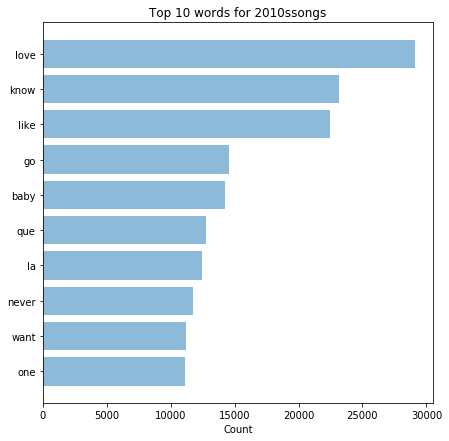

In [72]:
word_count(song_10s,50,'2010s')

## Analyze repotition in song lyrics
to analyze repetition in song lyrics (how "diverse" are the song words?) we take the nuber of unique song words divded by the total length of the song. <br/>
We will call this measure variance measure 
$$\text{variance} = \frac{\text{Number of unique words in lyircs}}{\text{total number of words in song}}$$

In [73]:
# get a feel of our data again in case we forgot
pop_data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...


In [74]:
test = "this is a test sentence"
np.unique(np.array(test.split())).shape[0]

5

In [75]:
# convert string into a numpy array of words then use numpy unique to find the number of unique words in the lyrics
# 
# df['Text'] = df['Text'].str.split().str[:-1].str.join(' ')
pop_data['variance'] = np.unique(np.array(pop_data['lyrics'].str.split())).shape[0] / len(pop_data['lyrics'].str.split())

c:\users\jing yun\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [46]:
pop_data.head()

,song,year,artist,genre,lyrics,variance,variance
index,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...,0.9161,0.9161
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...,0.9161,0.9161
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...,0.9161,0.9161
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.9161,0.9161
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...,0.9161,0.9161


### Testing capabiliites of nltk

In [27]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("generalized"))

general


In [28]:
print(stemmer.stem("nigga"))
print(stemmer.stem("aint"))

nigga
aint


In [29]:
print(stemmer.stem("niggas"))
print(stemmer.stem("got"))

nigga
got
